In [15]:
# Parameters

lensR = 0.025 # The radius of the required lens in SI units
distH = 1 # The distance between the required lens and the light source in
          # SI units, which equals the distance between the required lens
          # and the photomultiplier 
numPiece = 100000 # The number of pieces that half of the required lens is
                  # divided into
pieceLen = lensR/numPiece # The length of each "piece" of the required lens
                          # in SI units
refIndex = 1.33 # The refractive index of the material that the required lens
                # is made from
speed = 3*(10**8) # The speed of light in SI units

In [16]:
# The function that calculates the times for various paths that a photon
# may take to travel from the light source to the photomultiplier

def createTimes(numPiece, pieceLen, distH, lensR, speed):
    timesList = []
    for i in range(numPiece+1):
        time = (2*math.sqrt((lensR-i*pieceLen)**2+distH**2))/speed
        timesList.append(time)
    return timesList

In [17]:
# The function that calculates the halfwidth of the required lens at various
# points on its upper half

def createHalfWidths(timesListCopy, numPiece, refIndex, speed):
    halfWidthsList = []
    for i in range(numPiece+1):
        halfWidth = (timesList[0]-timesList[i])*(speed/refIndex)
        halfWidthsList.append(halfWidth)
    return halfWidthsList

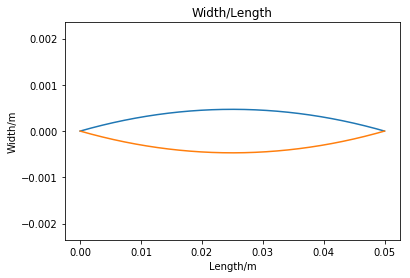

In [18]:
# Code that sketches the shape of the required lens

import math
import pylab
timesList = createTimes(numPiece, pieceLen, distH, lensR, speed)
timesListCopy = []
for i in range(numPiece+1):
    timesListCopy.append(timesList[i])
halfWidthsList = createHalfWidths(timesListCopy, numPiece, refIndex, speed)
halfWidthsCopy = []
for i in range(numPiece+1):
    halfWidthsCopy.append(halfWidthsList[i])
halfWidthsCopy.reverse()
halfWidths = halfWidthsList[0:numPiece]+halfWidthsCopy
halfWidthsNeg = []
for i in range(2*numPiece+1):
    halfWidthsNeg.append(-1*halfWidths[i])
length = []
for i in range(2*numPiece+1):
    length.append(i*pieceLen)
pylab.figure("Width/Length")
pylab.title("Width/Length")
pylab.plot(length, halfWidths)
pylab.plot(length, halfWidthsNeg)
pylab.xlabel("Length/m")
pylab.ylabel("Width/m")
pylab.ylim(-(halfWidthsList[numPiece])*5, (halfWidthsList[numPiece])*5)
pylab.show()